# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz

# Load the data

In [2]:
X_train = pd.read_csv('../data/X_train.csv', index_col=0)
y_train = pd.read_csv('../data/y_train.csv', index_col=0)
X_test = pd.read_csv('../data/X_test.csv', index_col=0)
y_test = pd.read_csv('../data/y_test.csv', index_col=0)

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(110, 15) (110, 1) (48, 15) (48, 1)


# Adjusted R^2 function

Here I will define a function that calculates the adjusted R^2 metric when it is passed the value of an R^2 score and the n and p values. The n value for the training data is equal to the n value for the testing data. The same goes for the p values of the training and testing data. Despite this, I define two seperate n values and two seperate p values.

In [4]:
# adjusted R^2: takes into consideration the model's degrees of freedom (amount of features)

# n is the number of labels in the data
n_train = len(X_train)
n_test = len(X_test)

# p is the number of features in the data (both equal)
p_train = len(X_train.columns)
p_test = len(X_test.columns)

# function to calculate adjusted R^2
def adjusted_r2(r2, n, p):
    adj_r_squared = 1-((1-r2)*((n-1)/(n-p-1)))
    return adj_r_squared

# Baseline performance model

I will start off by first using the mean of the salaries in the training data as a predictor and determining how good this "model" is at predicting.

In [5]:
dummy_mean_reg = DummyRegressor(strategy='mean')
dummy_mean_reg.fit(X_train, y_train)

# this is equal to the mean of the salaries in the training data
mean_salary = dummy_mean_reg.constant_
print('Mean of salaries in training data:', mean_salary)

Mean of salaries in training data: [[13713664.98878788]]


In [6]:
y_pred_train = dummy_mean_reg.predict(X_train)
y_pred_test = dummy_mean_reg.predict(X_test)

# R^2: measure of the proportion of variance in the dependent variable (salary) that is predicted by the model
r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)

r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

R^2 (actual and predicted training salaries): 0.0
R^2 (actual and predicted testing salaries): -0.0011446221634241471


In [7]:
# adjusted R^2
adj_r_squared_train = adjusted_r2(r_squared_train, n_train, p_train)
print('Adjusted R^2 (actual and predicted training data):', adj_r_squared_train)

adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

Adjusted R^2 (actual and predicted training data): -0.15957446808510634
Adjusted R^2 (actual and predicted testing data): -0.47043116380252914


In [8]:
# MAE: average of the absolute errors
MAE_train = mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error (actual and predicted training salaries):', MAE_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

Mean absolute error (actual and predicted training salaries): 7067479.767663912
Mean absolute error (actual and predicted testing salaries): 6951335.557159091


In [9]:
# RMSE: square root of average of the square of the errors
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('Root mean squared error (actual and predicted training salaries):', RMSE_train)

RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

Root mean squared error (actual and predicted training salaries): 8290153.791310435
Root mean squared error (actual and predicted testing salaries): 8507852.202054001


The R^2 score between the actual training salaries and the predicted training salaries, which is just the mean of the actual training salaries, is zero. This makes sense. However, the R^2 between the actual testing salaries and the predicted testing salaries is below zero. This also makes sense since R^2 essentially compares the model its scoring with a mean model. As a result of these two R^2 scores being zero and negative, respectively, the adjusted R^2 scores are negative.

As for mean absolute errors indicate that the dummy mean model was off by about \\$7 million while the root mean squared errors indicate that the model was of by over \\$8 million. These are huge given that the average salary of players in the training group is \\$13 million.

So it turns out that this model, which is just to guess that the salaries of the test group are the mean of the salaries in the train group, is not accurate at all.

# Linear regression models

### sklearn's Linear Regression model

In [10]:
lin_reg = LinearRegression(normalize=False, n_jobs=-1)
lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)

r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

R^2 (actual and predicted training salaries): 0.6214726671720142
R^2 (actual and predicted testing salaries): 0.3892925341343615


In [11]:
# adjusted R^2
adj_r_squared_train = adjusted_r2(r_squared_train, n_train, p_train)
print('Adjusted R^2 (actual and predicted training data):', adj_r_squared_train)

adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

Adjusted R^2 (actual and predicted training data): 0.5610693693803144
Adjusted R^2 (actual and predicted testing data): 0.10302340950984346


In [12]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error (actual and predicted training salaries):', MAE_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

Mean absolute error (actual and predicted training salaries): 3993532.9918702403
Mean absolute error (actual and predicted testing salaries): 4959487.833597617


In [13]:
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('Root mean squared error (actual and predicted training salaries):', RMSE_train)

RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

Root mean squared error (actual and predicted training salaries): 5100481.886511693
Root mean squared error (actual and predicted testing salaries): 6644895.293701198


The linear regression model performed much better than the dummy regression model in all three metrics, as expected. The R^2 for the test salaries was approximately 0.39, which is certainly better but it could be improved. The adjusted R^2, which takes into consideration the model's degrees of freedom was approximately 0.1. This confirms that the model could use improvement.

The MAE and RMSE for the testing salaries were approximately \\$5 million and \\$6.6 million respectively. This is much better than the mean model but that is still a lot of money to be off by.

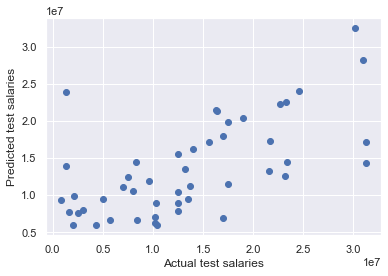

In [14]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

This scatter plot shows how well the predictions match the actual results. The x-axis represents the salaries in the test group while the y-represents the predicted salaries of the test group.

There is certainly a positive correlation between the two groups. However, there are a large set of salaries that were predicted to be much lower than what they actually are. For example, in the far right of the graph there is a point that represents an actual salary of about \\$31 million that was predicted to be just shy of \\$15 million.

There was also one salary that was predicted to be much higher than it actually was. The point on the top left was predicted to be about \\$24 million when it was actually about \\$1 million. This is a massive difference.

### sklearn's Linear Regression model on scaled data

In [15]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# linear regression model
lin_reg = LinearRegression(normalize=False, n_jobs=-1)
lin_reg.fit(X_train_scaled, y_train)

# predicted salaries
y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)

r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

R^2 (actual and predicted training salaries): 0.6214726671720141
R^2 (actual and predicted testing salaries): 0.3892925341343627


In [16]:
# n is the number of labels in the data
n_train = len(X_train)
n_test = len(X_test)

# p is the number of features in the data (both equal)
p_train = len(X_train.columns)
p_test = len(X_test.columns)

# adjusted R^2
adj_r_squared_train = adjusted_r2(r_squared_train, n_train, p_train)
print('Adjusted R^2 (actual and predicted training data):', adj_r_squared_train)

adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

Adjusted R^2 (actual and predicted training data): 0.5610693693803143
Adjusted R^2 (actual and predicted testing data): 0.10302340950984523


In [17]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error (actual and predicted training salaries):', MAE_train)

MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

Mean absolute error (actual and predicted training salaries): 3993532.9918702412
Mean absolute error (actual and predicted testing salaries): 4959487.833597624


In [18]:
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('Root mean squared error (actual and predicted training salaries):', RMSE_train)

RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

Root mean squared error (actual and predicted training salaries): 5100481.886511694
Root mean squared error (actual and predicted testing salaries): 6644895.293701191


Scaling the data using StandardScaled before using the same Linear Regression model produced negligible differences or no differences at all in for every metric.

### sklearn's Ridge regression model with scaled data using GridSearchCV

In [19]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ridge regression model
ridge = Ridge()

# alpha hyperparameter
param_grid = {'alpha':np.arange(0,100,0.1)}
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=5, n_jobs=-1)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

print('Best alpha:', best_alpha)
print('R^2 of best alpha:', best_score)

Best alpha: 13.9
R^2 of best alpha: 0.4327860264632486


GridSearchCV determined that the alpha hyperparameter that allowed the ridge regression model to perform the best was alpha=13.9. This model had an R^2 of about 0.433 for the training data. The linear regression model performed better than this model with the training data.

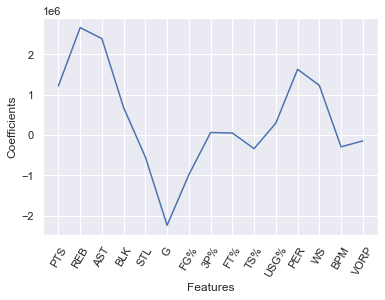

In [20]:
ridge = Ridge(alpha=13.9)

features = X_train.columns
ridge_coef = ridge.fit(X_train_scaled, y_train).coef_

plt.plot(range(len(features)), ridge_coef[0])
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.show()

The ridge regression model chooses a coefficient for each feature based on how important that feature is. The larger the coefficient, the more important it is. It determined that total rebounds (REB) are the most important feature. This is somewhat surprising but rebounds have always been the most unheralded of the basic statistics. Total assists (AST) are next. Players that distribute the ball very well are typicl=ally compenstated very well. The next important is games played (G). Since it's in the negative that means that as the games played in a season increases, the salary of the player decreases. This makes sense since most of the high salary players are also at least All-star level players which means they tend to take more games off due to "load management" or "injury management".

Interestingly, this model determined that 3-point field goal percentage (3P%) and free throw percentage (FT%) are unimportant enough to get a near-zero coefficient. Given the leagues shift towards a more 3-point centric offense, I would think this would be much higher.

In [21]:
y_pred_train = ridge_cv.predict(X_train_scaled)
y_pred_test = ridge_cv.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.5856605149257142
R^2 (actual and predicted testing salaries): 0.4230847569155054

Adjusted R^2 (actual and predicted training data): 0.34227315834568195
Adjusted R^2 (actual and predicted testing data): 0.1526557367196486

Mean absolute error (actual and predicted training salaries): 4209099.690928705
Mean absolute error (actual and predicted testing salaries): 4715319.277424536

Root mean squared error (actual and predicted training salaries): 5336306.280906555
Root mean squared error (actual and predicted testing salaries): 6458438.587896661


The ridge regression model performed a little bit better than the linear regression model. The R^2 and adjusted R^2 for the testing data for the linear regression model was approximately 0.389 and 0.103, respectively. The MAE and RMSE for the testing data for the linear regression model was approximately \\$4,959,488 and \\$6,644,895, respectively. There were improvements for all four of these metrics.

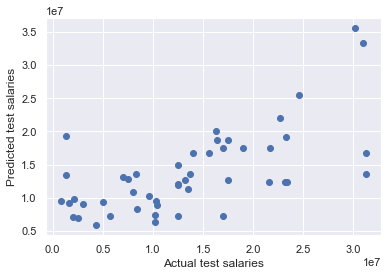

In [22]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

This scatter plot shows how well the predictions match the actual results for the ridge regression model. The x-axis represents the salaries in the test group while the y-represents the predicted salaries of the test group.

Juat as with the linear regression results, there seems to be a positive correlation between the predicted and actual salaries. Also, the points on this plot seems slighlty tighter than the linear regression model which makes since given the better metrics.

The far right point that I pointed out in the first graph was predicted to be similar. That salary of about \\$31 million that was predicted to be just shy of \\$15 million. However, the other point I focused on was the one that was top left most. Where in the previous model that point was predicted to be about \\$24 million when it was actually about \\$1 million, this model predicted it to be about just under \\$20 million. This difference isn't as massive, but still quite significant.

### sklearn's Lasso regression model with scaled data using GridSearchCV

In [23]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# lasso regression model
lasso = Lasso()

# alpha hyperparameter
param_grid = {'alpha':np.arange(0,100,0.1)}
lasso_cv = GridSearchCV(lasso, param_grid=param_grid, cv=5, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.best_params_['alpha']
best_score = lasso_cv.best_score_

print('Best alpha:', best_alpha)
print('R^2 of best alpha:', best_score)

Best alpha: 99.9
R^2 of best alpha: 0.3745317665440985


In [24]:
pd.DataFrame(lasso_cv.cv_results_)[['param_alpha', 'params', 'mean_test_score', 'rank_test_score']].tail()

,param_alpha,params,mean_test_score,rank_test_score
995,99.5,{'alpha': 99.5},0.374531,5
996,99.6,{'alpha': 99.60000000000001},0.374531,4
997,99.7,{'alpha': 99.7},0.374532,3
998,99.8,{'alpha': 99.80000000000001},0.374532,2
999,99.9,{'alpha': 99.9},0.374532,1


GridSearchCV determined that the alpha hyperparameter that allowed the lasso regression model to perform the best was alpha=99.9. This model had an R^2 of about 0.375 for the training data. The alpha was the maximum value of all the possible options I gave it to try. Also the next best 4 scores, which are 99.8, 99.7, 99.6, and 99.5, have virtually identical scores. This seems to suggest that this is about as good as the model will perform no matter what other alpha values I use. That being said, the linear regression model and the ridge regression model both performed better than this model.

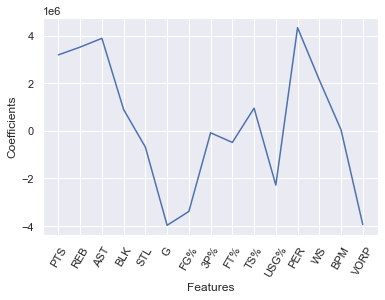

In [25]:
lasso = Lasso(alpha=99.9)

features = X_train.columns
lasso_coef = lasso.fit(X_train_scaled, y_train).coef_

plt.plot(range(len(features)), lasso_coef)
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.show()

The lasso model had some different results in terms of determining the importance of each feature. According to this model, player efficiency rating (PER) is the most important feature. This is a way to quantify a player's overall offensive production so this makes sense. The next three most important are total assists (AST), games played (G), and value over replacement player (VORP). All three of these had the same coefficient magnitude but the G and VORP coefficients were negative while the AST coefficient was positive. The most obvious difference between the lasso and ridge coefficients is the one for VORP. The lasso model has a -4 coefficient for VORP but the ridge model had a near-zero coefficient. Typically the best players have a high VORP stat so the coefficients for both of these models is unexpected. Both models, however, agreed on games played. Beyond these observations, both models produced similar coefficients.

In [26]:
y_pred_train = lasso_cv.predict(X_train_scaled)
y_pred_test = lasso_cv.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.6214726262264259
R^2 (actual and predicted testing salaries): 0.38937655732781506

Adjusted R^2 (actual and predicted training data): 0.2747230058862419
Adjusted R^2 (actual and predicted testing data): 0.10314681857522834

Mean absolute error (actual and predicted training salaries): 3993490.105275705
Mean absolute error (actual and predicted testing salaries): 4958987.241388082

Root mean squared error (actual and predicted training salaries): 5100482.1623731805
Root mean squared error (actual and predicted testing salaries): 6644438.164421354


Across the board, regarding the testing data, the lasso regression model performed worse than the ridge regression model and only marginally better than the linear regression model.

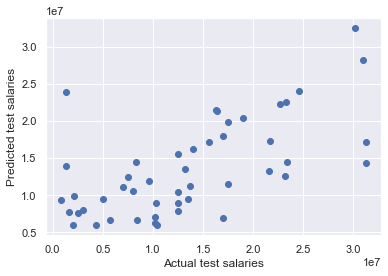

In [27]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

The scatter plot for the actual and predicted test salaries is also very similar to the one produced by the linear regression model.

### sklearn's ElasticNet regression model with scaled data using GridSearchCV

In [28]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# elastic net regression model
elastic_net = ElasticNet()

# alpha and l1_ratio hyperparameters
param_grid = {'alpha':np.arange(0,100,0.1), 'l1_ratio':np.arange(0,1,0.1)}
elastic_net_cv = GridSearchCV(elastic_net, param_grid=param_grid, cv=5, n_jobs=-1)
elastic_net_cv.fit(X_train_scaled, y_train)

best_combo = elastic_net_cv.best_params_
best_score = elastic_net_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combination:', best_score)

Best combination: {'alpha': 1.6, 'l1_ratio': 0.9}
R^2 of best combination: 0.43278377105347204


The elastic net model had an R^2 for the training data that is negligibly worse than the ridge regression model, which has thus far been the best performing model.

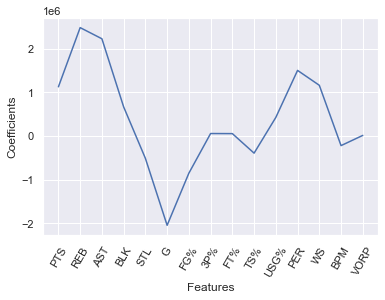

In [29]:
elastic_net = ElasticNet(alpha=1.6, l1_ratio=0.9)

features = X_train.columns
elastic_net_coef = elastic_net.fit(X_train_scaled, y_train).coef_

plt.plot(range(len(features)), elastic_net_coef)
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.show()

The elastic net coefficients are very similar to the ridge coefficients.

In [30]:
y_pred_train = elastic_net_cv.predict(X_train_scaled)
y_pred_test = elastic_net_cv.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.5784262474028936
R^2 (actual and predicted testing salaries): 0.4226972406137044

Adjusted R^2 (actual and predicted training data): 0.34227054303008997
Adjusted R^2 (actual and predicted testing data): 0.15208657215137833

Mean absolute error (actual and predicted training salaries): 4255236.742225259
Mean absolute error (actual and predicted testing salaries): 4710168.546731311

Root mean squared error (actual and predicted training salaries): 5382690.005457102
Root mean squared error (actual and predicted testing salaries): 6460607.30343262


Just as for the R^2 for the training data, the metrics for the testing data were also very close, but the ridge regression model still edges it out. The R^2, adjusted R^2, and the RMSE with the testing data for the elastic net model were only slighly worse. It's MAE was better but again the difference wasn't significant.

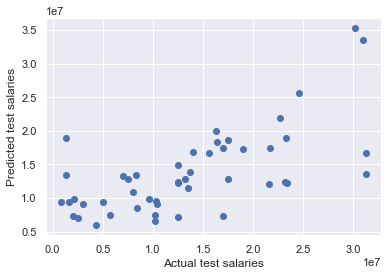

In [31]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

This scatter plot of the actual and predicted testing salary is very similar to the one produced with the ridge regression predictions. Even the outlier data points located on the leftmost and rightmost portions of the graph are placed in near the exact same spots.

### sklearn's DecisionTree regression model with scaled data using GridSearchCV

In [32]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DecisionTree regression model
dtr = DecisionTreeRegressor(random_state=77)

# hyperparameters
param_grid = {'criterion':['mse','friedman_mse', 'mae', 'poisson'], 
              'splitter':['best','random'], 
              'max_depth':np.arange(0,9),
              'min_samples_split':np.arange(0,9), 
              'min_samples_leaf':np.arange(0,9), 
              'min_weight_fraction_leaf':np.arange(0,1.25,0.25)}
dtr_cv = GridSearchCV(dtr, param_grid=param_grid, cv=5, n_jobs=-1)
dtr_cv.fit(X_train_scaled, y_train)

best_combo = dtr_cv.best_params_
best_score = dtr_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combo:', best_score)

Best combination: {'criterion': 'mae', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
R^2 of best combo: 0.36286011740059615


Of all the models I have used GridSearchCV on, this model has had the worst R^2 score. The next worst was the lasso model with an R^2 of approximately 0.3745.

In [33]:
dtr = DecisionTreeRegressor(random_state=77, 
                            criterion='mae', 
                            max_depth=3, 
                            min_samples_leaf=7, 
                            min_samples_split=2, 
                            min_weight_fraction_leaf=0.0, 
                            splitter='random')
dtr.fit(X_train_scaled, y_train)
                            
y_pred_train = dtr.predict(X_train_scaled)
y_pred_test = dtr.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.4798729113694459
R^2 (actual and predicted testing salaries): 0.10609980759137028

Adjusted R^2 (actual and predicted training data): 0.26118885953898907
Adjusted R^2 (actual and predicted testing data): -0.31291590760017485

Mean absolute error (actual and predicted training salaries): 4591332.135454545
Mean absolute error (actual and predicted testing salaries): 5796544.278472222

Root mean squared error (actual and predicted training salaries): 5978845.399847469
Root mean squared error (actual and predicted testing salaries): 8039259.41133943


Just like with the GridSearchCV R^2 score, this model had the worst R^2, adjusted R^2, MAE and RMSE scores for the testing data (not including the dummy regressor model).

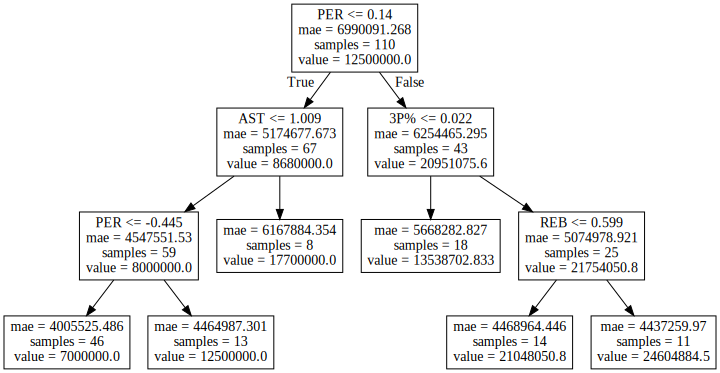

In [34]:
dot_data = export_graphviz(dtr, feature_names=X_train.columns)
graphviz.Source(dot_data)

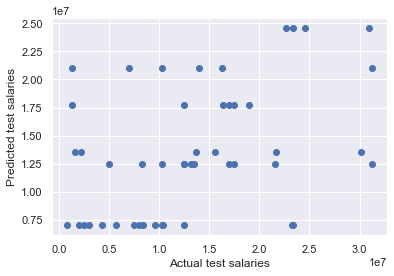

In [35]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

The graphic of the decision tree and the scatter plot comparing actual and predicted test salaries show above show just how crazy this model is. The model uses PER, 3P%, AST and REB to predict the salaries. The ridge, lasso, and elastic net models also determined that the PER, AST and REB features were very important. However, all three of these models determined that 3P% was amongst the most unimportant of features.

### sklearn's RandomForest regression model with scaled data using GridSearchCV

In [36]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest regression model
rfg = RandomForestRegressor(random_state=77)

# hyperparameters
param_grid = {'n_estimators':np.arange(10,110,10), 
              'criterion':['mse','mae'], 
              'bootstrap':[True, False]}
rfg_cv = GridSearchCV(rfg, param_grid=param_grid, cv=5, n_jobs=-1)

# used np.ravel on y_train to convert it from a column vector to a 1d array
rfg_cv.fit(X_train_scaled, np.ravel(y_train))

best_combo = rfg_cv.best_params_
best_score = rfg_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combo:', best_score)

Best combination: {'bootstrap': True, 'criterion': 'mae', 'n_estimators': 20}
R^2 of best combo: 0.44072616681476917


This random forest regressor has the best GridSearchCV R^2 score so far.

In [37]:
rfg = RandomForestRegressor(random_state=77, 
                            n_estimators=20,
                            criterion='mae',
                            bootstrap=True)
rfg.fit(X_train_scaled, np.ravel(y_train))
                            
y_pred_train = rfg.predict(X_train_scaled)
y_pred_test = rfg.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.9055482710972096
R^2 (actual and predicted testing salaries): 0.4617320250128516

Adjusted R^2 (actual and predicted training data): 0.35148034237031744
Adjusted R^2 (actual and predicted testing data): 0.20941891173762583

Mean absolute error (actual and predicted training salaries): 2008312.7086136364
Mean absolute error (actual and predicted testing salaries): 4598098.390972222

Root mean squared error (actual and predicted training salaries): 2547812.9647210706
Root mean squared error (actual and predicted testing salaries): 6238365.24270909


This has been the best model so far according to these metrics, for both the training and testing data. The ridge regression model, the best performing model tried before this one, had an R^2 on the testing data of about 0.423 and an adjusted R^2 of about 0.153. The testing data MAE and RMSE scores for the ridge model were about \\$4.7 million and \\$6.5 million respectively. The random forest model had better scores for all these metrics, albeit not by a whole lot.

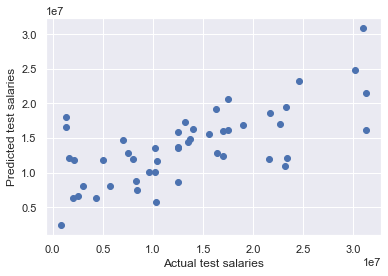

In [38]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

The scatter plot produced by the random forest model predictions looks slightly tighter than the one produced by the ridge model. On the leftmost side of the graph, the highest predicted value on the ridge graph was at just under \\$20 million. However, on this random forest graph, that value is closer \\$18 million. The decrease isn't by much given that the actual salary value of those predictions is about \\$1.5 million. On the rightmost side, the ridge ridge model predicted a salary that was actually \\$30 million to be \\$35 million while the random forest model predicted it to be \\$25 million. 

It seems as though these models struggle to predict salaries that are under \\$3 million and salaries that are over \\$30 million. In between, this model performs really well.

### sklearn's GradientBoosting regression model with scaled data using GridSearchCV

In [39]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GradientBoosting regression model
gbr = GradientBoostingRegressor(random_state=77)

# hyperparameters
param_grid = {'n_estimators':np.arange(10,310,10), 
              'loss':['ls','lad'], 
              'learning_rate':np.arange(0.1,0.7,0.1), 
              'max_depth':np.arange(1,4)}
gbr_cv = GridSearchCV(gbr, param_grid=param_grid, cv=5, n_jobs=-1)

gbr_cv.fit(X_train_scaled, np.ravel(y_train))

best_combo = gbr_cv.best_params_
best_score = gbr_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combo:', best_score)

Best combination: {'learning_rate': 0.5, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 260}
R^2 of best combo: 0.4395221139377335


This GridSearchCV mean R^2 score is the second best so far, barely being edged out by the random forest model which had a score of approximately 0.4407.

In [40]:
gbr = GradientBoostingRegressor(random_state=77, 
                                n_estimators=260, 
                                loss='lad', 
                                learning_rate=0.5, 
                                max_depth=2)
gbr.fit(X_train_scaled, np.ravel(y_train))
                            
y_pred_train = gbr.predict(X_train_scaled)
y_pred_test = gbr.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.8855335991646585
R^2 (actual and predicted testing salaries): 0.4143208777439694

Adjusted R^2 (actual and predicted training data): 0.3500841533958824
Adjusted R^2 (actual and predicted testing data): 0.13978378918645507

Mean absolute error (actual and predicted training salaries): 1054246.2325769933
Mean absolute error (actual and predicted testing salaries): 5030078.540925603

Root mean squared error (actual and predicted training salaries): 2804798.0771606187
Root mean squared error (actual and predicted testing salaries): 6507308.537233621


Overall this model did not perform as well as the random forest model.

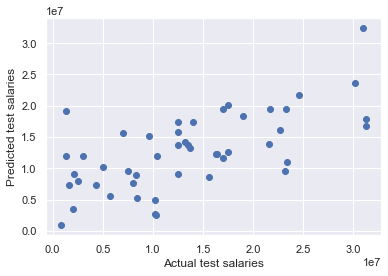

In [41]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

For the actual salaries under \\$5 million, the gradient boosting model had a slighter tighter collection of data points compared to the random forest model. The same goes for the actual salaries above \\$30 million. As for the salaries in between these two values, the random forest model did a much better job.

### sklearn's AdaBoosting regression model with scaled data using GridSearchCV

In [42]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# AdaBoost regression model
ada = AdaBoostRegressor(random_state=77)

# hyperparameters
param_grid = {'n_estimators':np.arange(10,110,10), 
              'loss':['linear','square','exponential'], 
              'learning_rate':np.arange(0.1,1.1,0.1)}
ada_cv = GridSearchCV(ada, param_grid=param_grid, cv=5, n_jobs=-1)

ada_cv.fit(X_train_scaled, np.ravel(y_train))

best_combo = ada_cv.best_params_
best_score = ada_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combo:', best_score)

Best combination: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 20}
R^2 of best combo: 0.4576899584771582


This model had a better grid search R^2 score than the random forest model which had the best score up unitl now with an R^2 of approximately 0.4407.

In [43]:
ada = AdaBoostRegressor(random_state=77, 
                                n_estimators=20, 
                                loss='linear', 
                                learning_rate=0.5)
ada.fit(X_train_scaled, np.ravel(y_train))
                            
y_pred_train = ada.predict(X_train_scaled)
y_pred_test = ada.predict(X_test_scaled)

r_squared_train = r2_score(y_train, y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(y_test, y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.7856629241965392
R^2 (actual and predicted testing salaries): 0.311980112909517

Adjusted R^2 (actual and predicted training data): 0.37115112206393885
Adjusted R^2 (actual and predicted testing data): -0.010529209164146902

Mean absolute error (actual and predicted training salaries): 3257417.7054164275
Mean absolute error (actual and predicted testing salaries): 5425524.857041398

Root mean squared error (actual and predicted training salaries): 3838055.3885808554
Root mean squared error (actual and predicted testing salaries): 7052969.782331473


The training data metrics were very good, but not so much for the testing data. In fact, it had some of the worst metrics regarding the testing data. This is a classic case of the model overfitting to the training data.

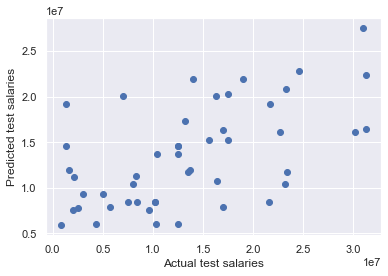

In [44]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

There was no need to display this scatter plot since the metrics already showed that this model was terrible, but for the sake of consistency here it is. This also shows just how bad this model worked for predicting the salary data.

# Model metrics

**models**-*metrics* | *mean R^2 (GridSearchCV)* | *R^2 (train)* | *R^2 (test)* | *Adjusted R^2 (train)* | *Adjusted R^2 (test)* | *MAE (train)* | *MAE (test)* | *RMSE (train)* | *RMSE (test)*
:----------|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:
**Dummy (mean) Regressor** | N/A | 0 | -0.001144622163 | -0.1595744681 | -0.4704311638 | 7067479.768 | 6951335.557 | 8290153.791 | 8507852.202
**Linear Regression (unscaled)** | N/A | 0.6214726672 | 0.3892925341 | 0.5610693694 | 0.1030234095 | 3993532.992 | 4959487.834 | 5100481.887 | 6644895.294
**Linear Regression (scaled)** | N/A | 0.6214726672 | 0.3892925341 | 0.5610693694 | 0.1030234095 | 3993532.992 | 4959487.834 | 5100481.887 | 6644895.294
**Ridge Regression (scaled)** | 0.4327860265 | 0.5856605149 | 0.4230847569 | 0.3422731583 | 0.1526557367 | 4209099.691 | 4715319.277 | 5336306.281 | 6458438.588
**Lasso Regression (scaled)** | 0.3745317665 | 0.6214726262 | 0.3893765573 | 0.2747230059 | 0.1031468186 | 3993490.105 | 4958987.241 | 5100482.162 | 6644438.164
**ElasticNet Regression (scaled)** | 0.4327837711 | 0.5784262474 | 0.4226972406 | 0.342270543 | 0.1520865722 | 4255236.742 | 4710168.547 | 5382690.005 | 6460607.303
**DecisionTreeRegressor (scaled)** | 0.3628601174 | 0.4798729114 | 0.1060998076 | 0.2611888595 | -0.3129159076 | 4591332.135 | 5796544.278 | 5978845.4 | 8039259.411
**RandomForestRegressor (scaled)** | 0.4407261668 | 0.9055482711 | 0.461732025 | 0.3514803424 | 0.2094189117 | 2008312.709 | 4598098.391 | 2547812.965 | 6238365.243
**GradientBoostingRegressor (scaled)** | 0.4395221139 | 0.8855335992 | 0.4143208777 | 0.3500841534 | 0.1397837892 | 1054246.233 | 5030078.541 | 2804798.077 | 6507308.537
**AdaBoostRegressor (scaled)** | 0.4576899585 | 0.7856629242 | 0.3119801129 | 0.3711511221 | -0.01052920916 | 3257417.705 | 5425524.857 | 3838055.389 | 7052969.782

The three best performing models were the ridge regression model, the elastic net model, and the random forest model. However, what I noticed about these models and all the other models was that they were very inaccurate with actual salaries below \\$3 million and salaries over \\$30 million. I pointed this out several times above when discussing the various scatterplots of the predicted vs. actual testing salaries. As a result, I will remove all of the salaries that fall within those ranges and use the three best performing models on the remaining data. This will no doubt produce better results.

# Load and remove "outlier" data

In [45]:
new_nba_data = pd.read_csv('../data/nba_data.csv', index_col=0)
new_nba_data.reset_index(drop=True, inplace=True)
new_nba_data.head()

,NAME,SEASON,PTS,REB,AST,BLK,STL,G,FG%,3P%,FT%,TS%,USG%,PER,WS,BPM,VORP,SALARY
0,Patrick Patterson,2017-2018,318.0,193.0,57.0,23.0,48.0,82,0.398,0.386,0.870,0.555,10.8,10.0,2.6,-1.3,0.2,4.325064e+06
1,E'Twaun Moore,2017-2018,1022.0,238.0,187.0,12.0,79.0,82,0.508,0.425,0.706,0.593,16.1,12.1,4.4,-0.2,1.2,8.680000e+06
2,Bismack Biyombo,2017-2018,468.0,468.0,66.0,95.0,21.0,82,0.520,0.000,0.650,0.556,14.9,14.1,2.9,-1.6,0.2,1.700000e+07
3,Khris Middleton,2017-2018,1652.0,429.0,328.0,21.0,119.0,82,0.466,0.359,0.884,0.577,24.6,17.4,6.9,0.4,1.8,1.752069e+07
4,Cory Joseph,2017-2018,649.0,263.0,260.0,18.0,80.0,82,0.424,0.353,0.745,0.503,14.8,11.0,3.1,-1.2,0.5,7.472500e+06


In [46]:
new_nba_data.shape

(158, 18)

In [47]:
# removing players with salaries less than $3 million and greater than $30 million
index_names = new_nba_data[(new_nba_data['SALARY']<=3000000) | (new_nba_data['SALARY']>=30000000)].index
new_nba_data.drop(index_names, inplace=True)

print('Number of bad salaries:', len(index_names), '\nShape of new_nba_data:', new_nba_data.shape)

Number of bad salaries: 29 
Shape of new_nba_data: (129, 18)


Out of the 158 salaries that were in the original data, 29 of those salaries were either \\$3 million or less or \\$30 million or greater. These have now been taken out and what remains are salaries that fall in between these two numbers. In theory, the models should now be able to perform much better. 

That being said, there is a reason why this data can be taken out other than the fact that it is "messing up the predictions". Generally speaking, salaries that fall under the \\$3 million threshold are for two types of players: players acquired late in a draft with very team-friendly (low-cost) contracts or players acquired after the vast majority of the roster is constructed. Both of these types are typically low-impact, end-of-the-bench types of players with salaries that are relatively cheap.

As for players that earn greater than \\$30 million, these types of contracts are given because teams have no choice regardless of the players actual worth. If they are amazing all-stars, then it becomes a no-brainer. But if these players are not but believe they are, or even worse, if other teams believe they are, teams have two options. They can let the player walk in free agency and lose the player without getting anything in exchange, or they could sign the player to the massive salary and hope they can play up to it for the benefit of the team.

# Split and scale the modified data

In [48]:
from sklearn.model_selection import train_test_split

# split the data
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_nba_data.drop(columns='SALARY'), new_nba_data.SALARY, test_size = 0.3, random_state=77)

In [49]:
# removing NAME and SEASON columns
name_and_season_list = ['NAME', 'SEASON']
name_and_season_train = new_X_train[name_and_season_list]
name_and_season_test = new_X_test[name_and_season_list]
new_X_train.drop(columns=name_and_season_list, inplace=True)
new_X_test.drop(columns=name_and_season_list, inplace=True)

In [50]:
# scaling the data
scaler = StandardScaler()
scaler.fit(new_X_train)
new_X_train_scaled = scaler.transform(new_X_train)
new_X_test_scaled = scaler.transform(new_X_test)

In [51]:
new_X_train_scaled.shape, new_X_test_scaled.shape, new_y_train.shape, new_y_test.shape

((90, 15), (39, 15), (90,), (39,))

The split data looks good so now the three best performing models can be implemented. I will do so in reverse order of performance with elastic net first, then ridge, then the random forest.

# Best performing models

### sklearn's ElasticNet regression model with scaled data using GridSearchCV

In [52]:
# elastic net regression model
elastic_net = ElasticNet()

# alpha and l1_ratio hyperparameters
param_grid = {'alpha':np.arange(0,100,0.1), 'l1_ratio':np.arange(0,1.1,0.1)}
elastic_net_cv = GridSearchCV(elastic_net, param_grid=param_grid, cv=5, n_jobs=-1)
elastic_net_cv.fit(new_X_train_scaled, new_y_train)

best_combo = elastic_net_cv.best_params_
best_score = elastic_net_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combination:', best_score)

Best combination: {'alpha': 1.5, 'l1_ratio': 0.9}
R^2 of best combination: 0.3255089928448643


Right of the bat something unexpected happened. The elastic net regression model with the original data had a mean R^2 (GridSearchCV) score of approximately 0.433 which is much better than the score it had here. The hyperparameters are also quite similar with the previous elastic net having alpha = 1.6 and l1_ratio = 0.9 also.

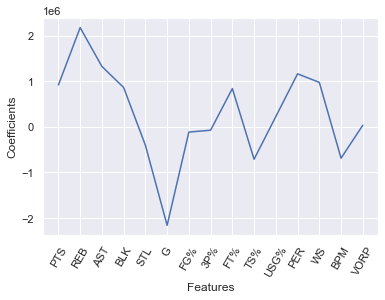

In [53]:
elastic_net = ElasticNet(alpha=1.5, l1_ratio=0.9)

features = new_X_train.columns
elastic_net_coef = elastic_net.fit(new_X_train_scaled, new_y_train).coef_

plt.plot(range(len(features)), elastic_net_coef)
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.show()

It also produced a different coefficient graph. This one determined FT% (free throw percentage) was important where the previous elastic net model had it as unimportant.

In [54]:
new_y_pred_train = elastic_net_cv.predict(new_X_train_scaled)
new_y_pred_test = elastic_net_cv.predict(new_X_test_scaled)

r_squared_train = r2_score(new_y_train, new_y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(new_y_test, new_y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(new_y_train, new_y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(new_y_test, new_y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(new_y_train, new_y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(new_y_test, new_y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.545580542323362
R^2 (actual and predicted testing salaries): 0.48210331774844506

Adjusted R^2 (actual and predicted training data): 0.21787744914989582
Adjusted R^2 (actual and predicted testing data): 0.23933924794302863

Mean absolute error (actual and predicted training salaries): 3644945.9446737864
Mean absolute error (actual and predicted testing salaries): 3290803.7826922834

Root mean squared error (actual and predicted training salaries): 4477399.322466566
Root mean squared error (actual and predicted testing salaries): 4227838.632356842


This model performed much better with the new testing data across the board. The RMSE in particular improved by over \\$2 million.

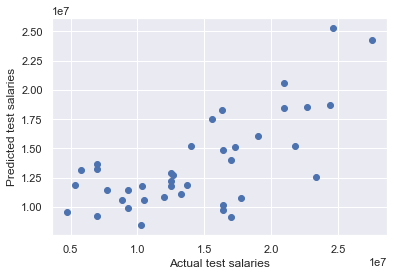

In [55]:
plt.scatter(new_y_test, new_y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

Most of the salaries are expected to be much lower than predicted, which points to a trend within the NBA that teams seem to pay players more than what their production indicates they are worth.

### sklearn's Ridge regression model with scaled data using GridSearchCV

In [56]:
# ridge regression model
ridge = Ridge()

# alpha hyperparameter
param_grid = {'alpha':np.arange(0,100,0.1)}
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=5, n_jobs=-1)
ridge_cv.fit(new_X_train_scaled, new_y_train)

best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

print('Best alpha:', best_alpha)
print('R^2 of best alpha:', best_score)

Best alpha: 10.5
R^2 of best alpha: 0.3255239242834003


Just as with the new elastic net model, this new ridge model seemingly performed worse and used different hyperparameters. The previous ridge model used alpha=13.9.

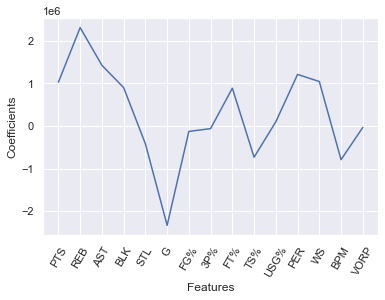

In [57]:
ridge = Ridge(alpha=10.5)

features = new_X_train.columns
ridge_coef = ridge.fit(new_X_train_scaled, new_y_train).coef_

plt.plot(range(len(features)), ridge_coef)
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.show()

Free throw percentage (FT%) also has greater importance to this model than in the previous ridge model.

In [58]:
new_y_pred_train = ridge_cv.predict(new_X_train_scaled)
new_y_pred_test = ridge_cv.predict(new_X_test_scaled)

r_squared_train = r2_score(new_y_train, new_y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(new_y_test, new_y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(new_y_train, new_y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(new_y_test, new_y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(new_y_train, new_y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(new_y_test, new_y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.5530187068712318
R^2 (actual and predicted testing salaries): 0.48293401651176193

Adjusted R^2 (actual and predicted training data): 0.21789476326479396
Adjusted R^2 (actual and predicted testing data): 0.2405593367516503

Mean absolute error (actual and predicted training salaries): 3609410.2864671573
Mean absolute error (actual and predicted testing salaries): 3275991.7954211268

Root mean squared error (actual and predicted training salaries): 4440603.97636227
Root mean squared error (actual and predicted testing salaries): 4224446.5756997345


In a pattern that continues that was totally expected, this new ridge model with the testing data performed better than the previous ridge model that used the original data. The RMSE improved by about \\$2 million as well. Additionally, the new ridge model performed marginally better than the new elastic net model along all the metrics.

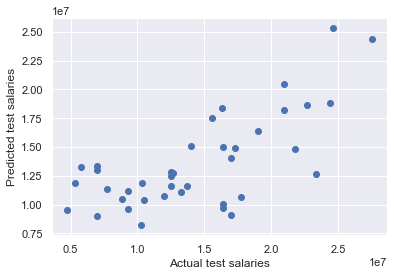

In [59]:
plt.scatter(new_y_test, new_y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

### sklearn's RandomForest regression model with scaled data using GridSearchCV

In [60]:
# RandomForest regression model
rfg = RandomForestRegressor(random_state=77)

# hyperparameters
param_grid = {'n_estimators':np.arange(10,110,10), 
              'criterion':['mse','mae'], 
              'bootstrap':[True, False]}
rfg_cv = GridSearchCV(rfg, param_grid=param_grid, cv=5, n_jobs=-1)

# used np.ravel on new_y_train to convert it from a column vector to a 1d array
rfg_cv.fit(new_X_train_scaled, np.ravel(new_y_train))

best_combo = rfg_cv.best_params_
best_score = rfg_cv.best_score_

print('Best combination:', best_combo)
print('R^2 of best combo:', best_score)

Best combination: {'bootstrap': True, 'criterion': 'mse', 'n_estimators': 50}
R^2 of best combo: 0.21833005328158067


Once again the hyperparameters were somewhat similar and the mean R^2 (GridSearchCV) was much worse. The original random forest model had an R^2 of approximately 0.441. Also, the original hyperparameters were bootstrap=True, criterion=mae and n_estimators=20.

In [61]:
rfg = RandomForestRegressor(random_state=77, 
                            n_estimators=50,
                            criterion='mse',
                            bootstrap=True)
rfg.fit(new_X_train_scaled, np.ravel(new_y_train))
                            
new_y_pred_train = rfg.predict(new_X_train_scaled)
new_y_pred_test = rfg.predict(new_X_test_scaled)

r_squared_train = r2_score(new_y_train, new_y_pred_train)
print('R^2 (actual and predicted training salaries):', r_squared_train)
r_squared_test = r2_score(new_y_test, new_y_pred_test)
print('R^2 (actual and predicted testing salaries):', r_squared_test)

adj_r_squared_train = adjusted_r2(best_score, n_train, p_train)
print('\nAdjusted R^2 (actual and predicted training data):', adj_r_squared_train)
adj_r_squared_test = adjusted_r2(r_squared_test, n_test, p_test)
print('Adjusted R^2 (actual and predicted testing data):', adj_r_squared_test)

MAE_train = mean_absolute_error(new_y_train, new_y_pred_train)
print('\nMean absolute error (actual and predicted training salaries):', MAE_train)
MAE_test = mean_absolute_error(new_y_test, new_y_pred_test)
print('Mean absolute error (actual and predicted testing salaries):', MAE_test)

RMSE_train = mean_squared_error(new_y_train, new_y_pred_train, squared=False)
print('\nRoot mean squared error (actual and predicted training salaries):', RMSE_train)
RMSE_test = mean_squared_error(new_y_test, new_y_pred_test, squared=False)
print('Root mean squared error (actual and predicted testing salaries):', RMSE_test)

R^2 (actual and predicted training salaries): 0.915468956106599
R^2 (actual and predicted testing salaries): 0.47112928194518755

Adjusted R^2 (actual and predicted training data): 0.09359548731587541
Adjusted R^2 (actual and predicted testing data): 0.2232211328569942

Mean absolute error (actual and predicted training salaries): 1474121.4861629636
Mean absolute error (actual and predicted testing salaries): 3419278.9080598294

Root mean squared error (actual and predicted training salaries): 1931103.210123439
Root mean squared error (actual and predicted testing salaries): 4272396.980846461


This new random forest model did not perform as well than the new ridge model despite the fact that it did perform better than the original random forest model.

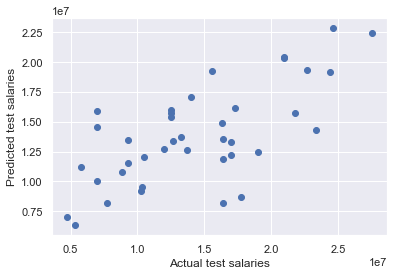

In [62]:
plt.scatter(new_y_test, new_y_pred_test)
plt.xlabel('Actual test salaries')
plt.ylabel('Predicted test salaries')
plt.show()

The random forest model predictions produced a visibly better scatterplot than either of the previous two models.

# New Model Metrics

**models**-*metrics* | *mean R^2 (GridSearchCV)* | *R^2 (train)* | *R^2 (test)* | *Adjusted R^2 (train)* | *Adjusted R^2 (test)* | *MAE (train)* | *MAE (test)* | *RMSE (train)* | *RMSE (test)*
:----------|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:
**ElasticNet Regression (scaled)** | 0.3255089928 | 0.5455805423 | 0.4821033177 | 0.2178774491 | 0.2393392479 | 3644945.945 | 3290803.783 | 4477399.322 | 4227838.632
**Ridge Regression (scaled)** | 0.3255239243 | 0.5530187069 | 0.4829340165 | 0.2178947633 | 0.2405593368 | 3609410.286 | 3275991.795 | 4440603.976 | 4224446.576
**RandomForestRegressor (scaled)** | 0.2183300533 | 0.9154689561 | 0.4711292819 | 0.09359548732 | 0.2232211329 | 1474121.486 | 3419278.908 | 1931103.21 | 4272396.981

The best performing model of the best performing models used on the data that didn't include salaries under \\$5 million and salaries greater than \\$30 million turned out to be the ridge regression model.